# **CMSE 381 Final Project**

### Group members: Tiffany Rennells,   
Section_002

## **Evaulating Predictors of Kidney Disease Progression Through Statistical Models**

## Background and Motivation

Chronic kidney disease (CKD) as of 2024 affects 9.1% of population worldwide accounting to about 737 million individuals [1]. CKD is a progressive condition characterized by decline in kidney function leading to increased risk of various disease including cardiovascular disease, kidney failure and premature death. Despite the prevalence of this disease, CKD often remains underdiagnosed making methods for early detection crucial [2]. 

Data sceince has the potential to serve as powerful tool that can serve as a predictive tool for CKD. With the use of large datasets, it is possible to uncover patterns and relationships that may not be immediately apparent, but can serve as a tool for early diagnosis and thus, early intervention for CKD.

This project aims to leverage tools to develop and evaluate models that can accurately predict the presence and progression of CKD. For prediction of the presence/absence of the disease, classification methods utilizing lasso and random forest will be used, while progression of the disease will be shown through assessing variables with correlations to CKD including _______. Methods include______ _______.With successful use of these models, the hope is for practical application of data-driven methods to early diagnosis and intervention of CKD to improve patient outcomes and decrease health burdens. 

## Methodology

**Classification**  
To predict the presence or absence of chronic kidney disease (CKD), we implemented two supervised learning methods: LASSO logistic regression and Random Forest classification.

The two methods were chosen for their contrasting approaches to classification. LASSO logistic regression produces a interpertable model by shrinking many coefficients to zero, essentially performing automatic variable selection. This makes it possible to identify the most clinically relevant predictors of CKD. Additionally, the regularization strength (alpha) can be tuned to control the degree of shrinkage allowing for control of flexibility of the model.  

In contrast, random forest is a nonlinear method for classification. It also offers parameters that can be fine-tuned to alter flexibility through parameters such as number of trees and maximum tree depth. In addition, compared to a single decision tree, random forest reduces variance by decorrelating trees. It does this by completing the model with only a random subset of predictors. This along with bootstrapping produces a more reliable classifier. 

By comparing these two models, we can evaluate the relative success of each models as well as the most influential variables in determining CKD presence. 

**Regression**


### Data

The original CKD dataset contained numerous categorical clinical features, many of which were given in intervals (ex, '1.009-1.011' or >4).  
During our data cleaning process, each variable defined by an interval was separated into 'low' and 'high' numerical values, while categorical variables such as diabetes (dm) and hypertension (htn) were retained as binary variables.  

The final modeling dataset consisted of numeric predictors making it suitable for both regression and classification applications. 

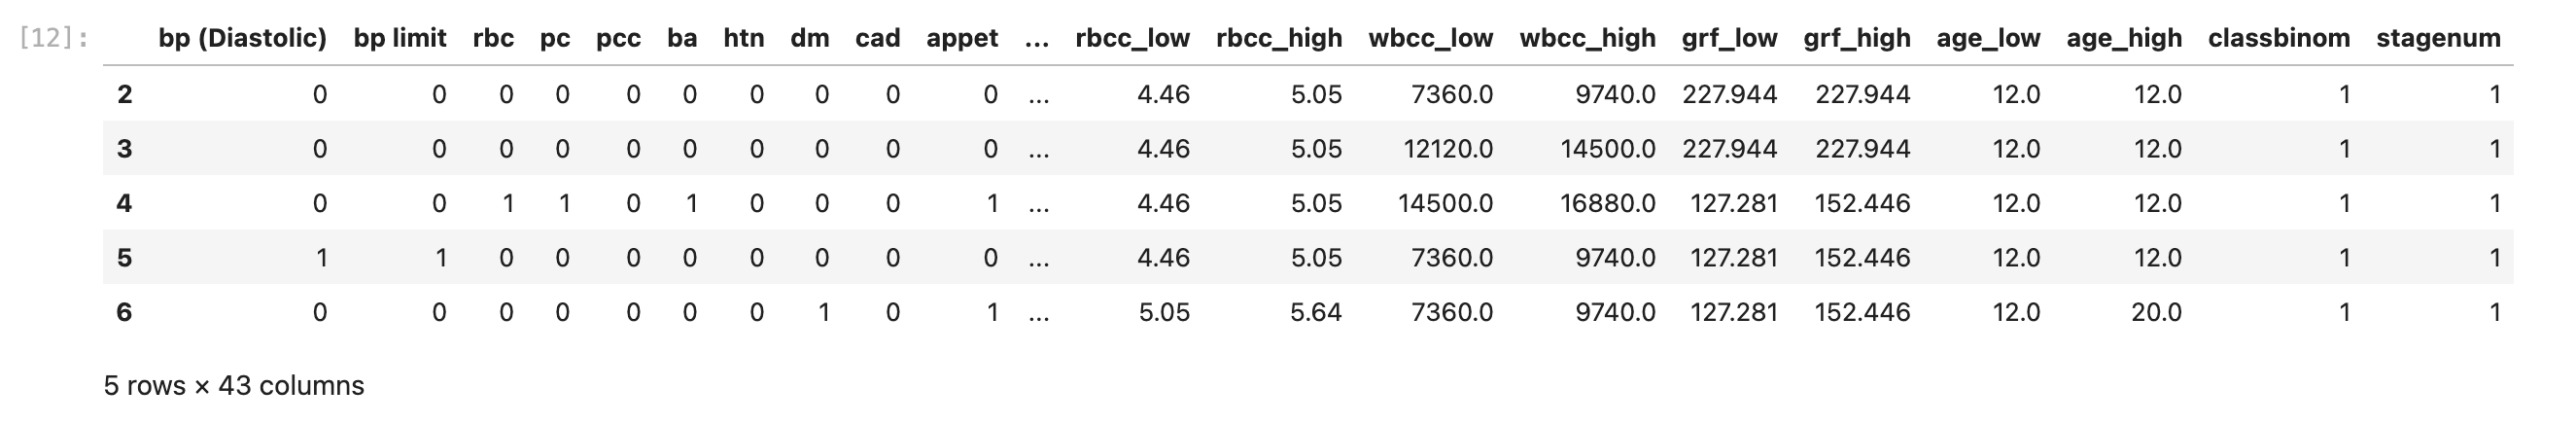


### Models for classification

#### Prepare the Data

In [11]:
# Prepare the predictors and target variables
y = df["classbinom"]
X = df.drop(columns=["classbinom", "stagenum", "affected"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=381)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#### Lasso Logistic Regression  

Overview:

In [12]:
lasso = LassoCV(cv=10, random_state=381)
lasso.fit(X_train_scaled, y_train)

lasso_alpha = lasso.alpha_
lasso_pred = (lasso.predict(X_test_scaled) > 0.5).astype(int)

lasso_acc = accuracy_score(y_test, lasso_pred)
print("Lasso Accuracy:",lasso_acc)

Lasso Accuracy: 0.96


#### Random Forest Classification

Overview:  

In [33]:
param_grid = {'max_depth': [3, 5, 10, 20, None]}

rf_base = RandomForestClassifier(n_estimators=300,random_state=381)

grid = GridSearchCV(rf_base,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_

rf_pred = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)

Best parameters: {'max_depth': 5}
Random Forest Accuracy: 0.96


### Models for Regression

## Results

Lasso Logistic regression:  

Insert confusion matrix of how well lasso regression predicted. Also maybe include some graphs (varying alpha values and regression) 

Random forest regression:  

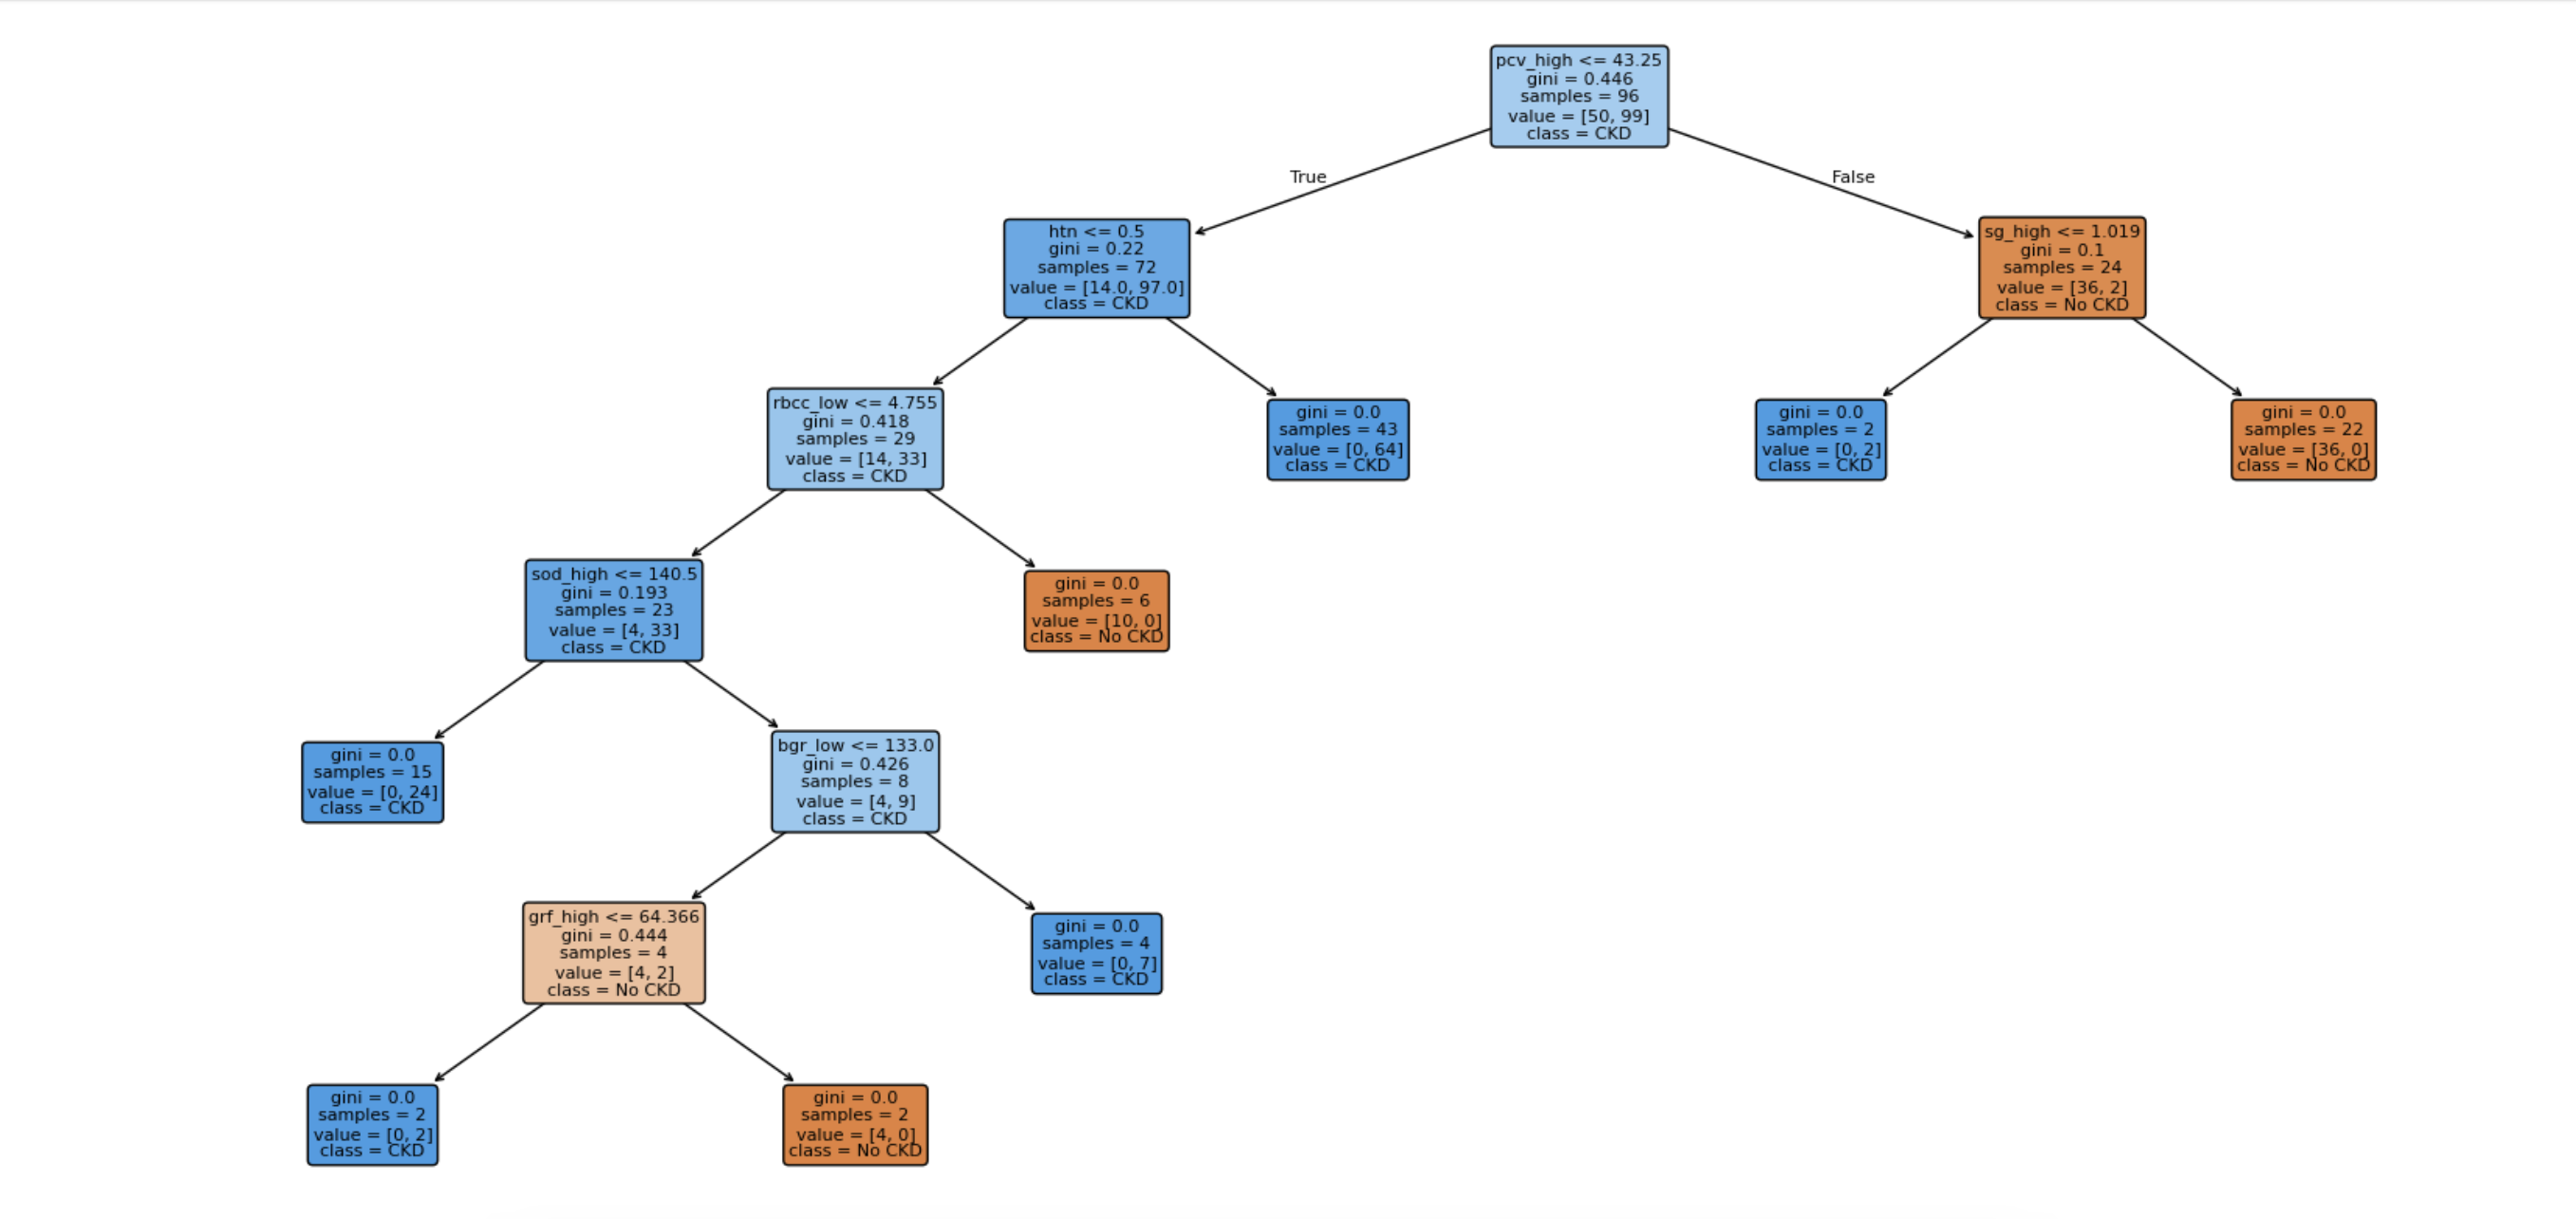  

Also insert some graphs with varying param_grid and cv error